<a href="https://colab.research.google.com/github/arhtudormorar/ML/blob/main/Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

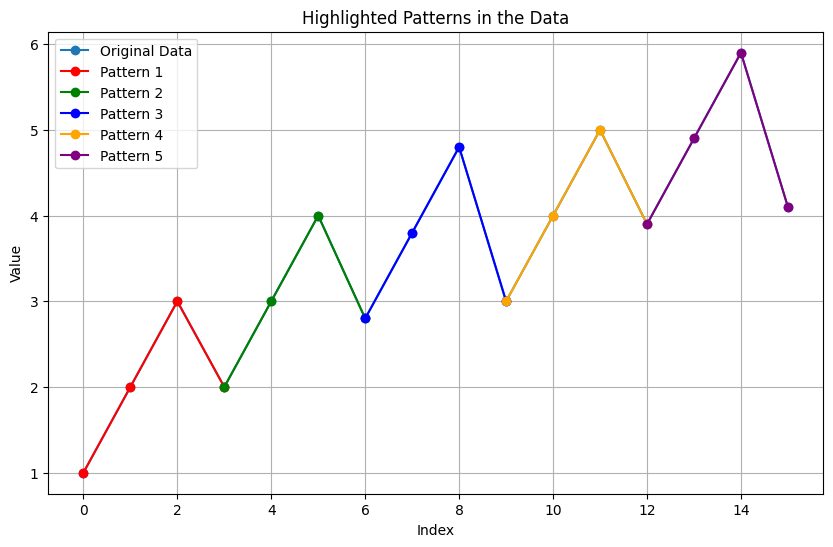

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = np.array([1, 2, 3, 2, 3, 4, 2.8, 3.8, 4.8, 3, 4, 5, 3.9, 4.9, 5.9, 4.1])

# Create index for the data
index = np.arange(len(data))

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(index, data, marker='o', label='Original Data')

# Highlight patterns
patterns = [
    (0, 3),   # First pattern: indices 0 to 2
    (3, 6),   # Second pattern: indices 3 to 5
    (6, 9),   # Third pattern: indices 6 to 8
    (9, 12),  # Fourth pattern: indices 9 to 11
    (12, 15)  # Fifth pattern: indices 12 to 14
]

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, (start, end) in enumerate(patterns):
    plt.plot(index[start:end+1], data[start:end+1], marker='o', color=colors[i], label=f'Pattern {i+1}')

plt.title('Highlighted Patterns in the Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install mplfinance



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


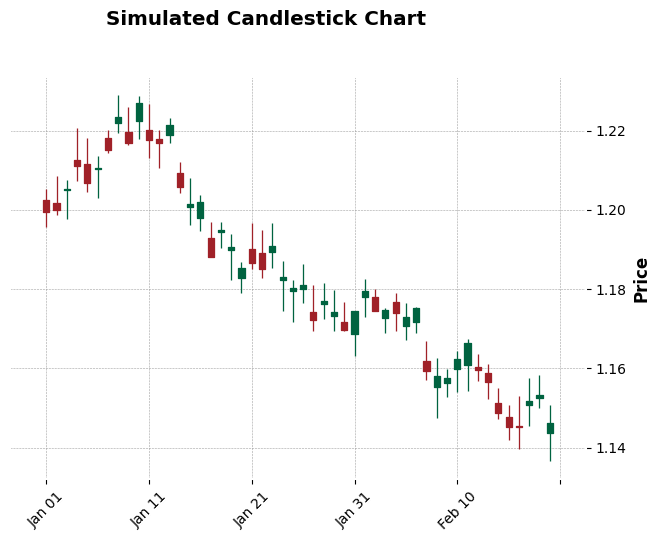

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import mplfinance as mpf

# Simulated data for a candlestick chart
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start="2023-01-01", periods=50, freq='D')
price_changes = np.random.normal(0, 0.005, size=(50,))
prices = np.cumsum(price_changes) + 1.2

data = {
    "Date": dates,
    "Open": prices,
    "High": prices + np.random.uniform(0.002, 0.008, size=(50,)),
    "Low": prices - np.random.uniform(0.002, 0.008, size=(50,)),
    "Close": prices + np.random.normal(0, 0.003, size=(50,))
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Plotting the candlestick chart using mplfinance
mpf.plot(df,
         type='candle',
         style='charles',
         title='Simulated Candlestick Chart',
         ylabel='Price')

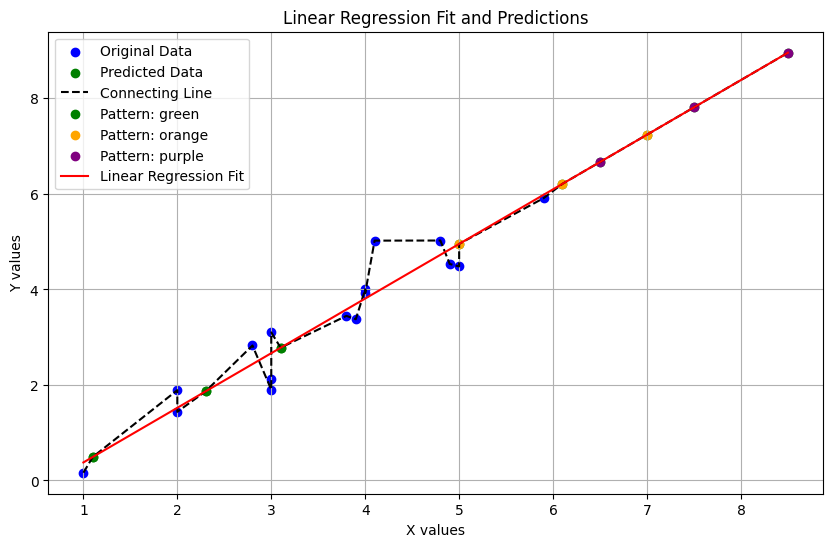

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Original array
original_array = [1, 2, 3, 2, 3, 4, 2.8, 3.8, 4.8, 3, 4, 5, 3.9, 4.9, 5.9, 4.1]

# Sort the original array
sorted_array = sorted(original_array)

# Prepare the data
X = np.array(sorted_array).reshape(-1, 1)
Y = np.array([i + np.random.normal(0, 0.5) for i in sorted_array])  # Adding noise to create a relation

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, Y)

# Additional examples
additional_examples = [[1.1, 2.3, 3.1], [5, 6.1, 7], [6.5, 7.5, 8.5]]

# Predicting for the additional examples
additional_examples_flat = np.array(additional_examples).flatten().reshape(-1, 1)
predictions = model.predict(additional_examples_flat)

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of sorted original array and predictions
plt.scatter(sorted_array, Y, color='blue', label='Original Data')
plt.scatter(additional_examples_flat, predictions, color='green', label='Predicted Data')

# Connect all dots in order with a line
all_points = np.concatenate((X.flatten(), additional_examples_flat.flatten()))
all_predictions = np.concatenate((Y, predictions))
sorted_indices = np.argsort(all_points)
plt.plot(all_points[sorted_indices], all_predictions[sorted_indices], color='black', linestyle='--', label='Connecting Line')

# Adding patterns for the same values
patterns = {'green': [1.1, 2.3, 3.1], 'orange': [5, 6.1, 7], 'purple': [6.5, 7.5, 8.5]}

# Creating color-coded patterns
for color, values in patterns.items():
    plt.scatter(values, model.predict(np.array(values).reshape(-1, 1)), color=color, label=f'Pattern: {color}')

# Model line
X_range = np.linspace(min(sorted_array), max(additional_examples_flat), 100).reshape(-1, 1)
Y_range = model.predict(X_range)
plt.plot(X_range, Y_range, color='red', label='Linear Regression Fit')

# Additional plot settings
plt.title('Linear Regression Fit and Predictions')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid(True)
plt.show()

This heatmap visualizes the differences between adjacent rows across all columns in the given matrix. Let me break down the key aspects of this visualization:
Structure:
The y-axis represents "Row Pairs", numbered from 0 to 8, indicating the pairs of adjacent rows being compared.
The x-axis shows "Columns", numbered from 0 to 3, representing the four columns of the original matrix.
Each cell contains a number and is color-coded, representing the absolute difference between adjacent rows for that specific column.
Color Scale:
The color scale on the right ranges from light yellow (low values) to dark blue (high values).
Lighter colors indicate smaller differences, while darker colors represent larger differences.
Key Observations:
Row Pairs 0 and 8 (first and last rows) show a consistent difference of 4 across all columns, indicated by the uniform teal color.
There's significant variation in the differences between other row pairs, as shown by the diverse colors and values.
Some cells show very large differences (e.g., value 8 in dark blue), while others show no difference (value 0 in light yellow).
Patterns:
The first and last row pairs (0 and 8) have identical patterns, suggesting a cyclical or symmetrical structure in the data.

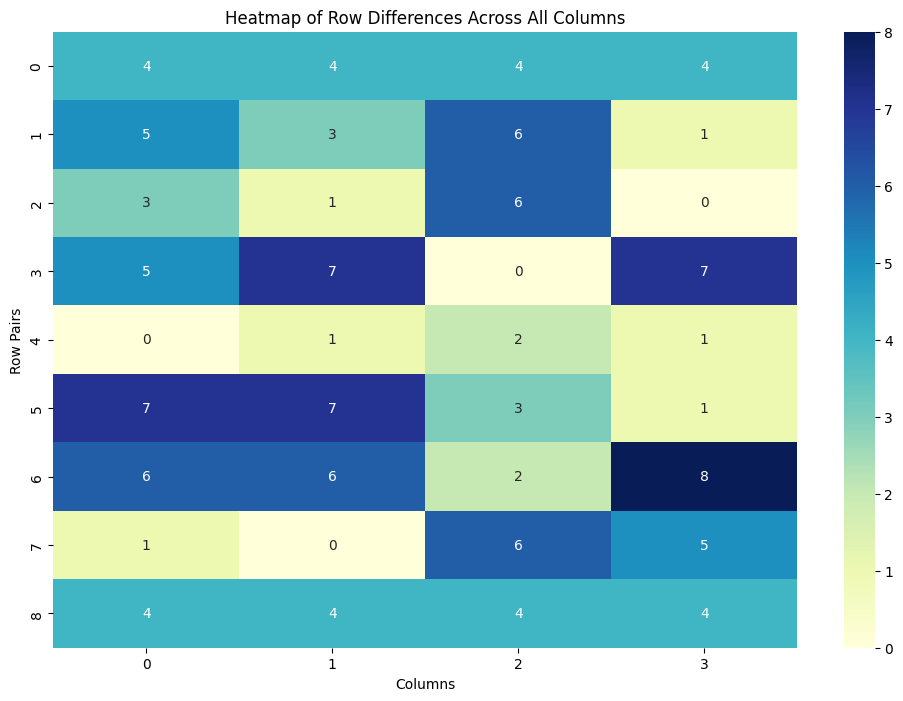

Difference between rows 1 and 2: Cluster 2
Difference between rows 2 and 3: Cluster 3
Difference between rows 3 and 4: Cluster 3
Difference between rows 4 and 5: Cluster 1
Difference between rows 5 and 6: Cluster 3
Difference between rows 6 and 7: Cluster 2
Difference between rows 7 and 8: Cluster 1
Difference between rows 8 and 9: Cluster 3
Difference between rows 9 and 10: Cluster 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Given matrix
matrix = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [10, 9, 1, 9],
    [7, 8, 7, 9],
    [2, 1, 7, 2],
    [2, 2, 5, 3],
    [9, 9, 8, 2],
    [3, 3, 10, 10],
    [2, 3, 4, 5],
    [6, 7, 8, 9]
])

# Calculate row differences (using the same matrix as before)
row_differences = np.abs(np.diff(matrix, axis=0))

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(row_differences)

# Create a heatmap of row differences
plt.figure(figsize=(12, 8))
sns.heatmap(row_differences, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Row Differences Across All Columns')
plt.xlabel('Columns')
plt.ylabel('Row Pairs')
plt.show()

# Print cluster assignments
for i, label in enumerate(kmeans.labels_):
    print(f"Difference between rows {i+1} and {i+2}: Cluster {label+1}")


C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


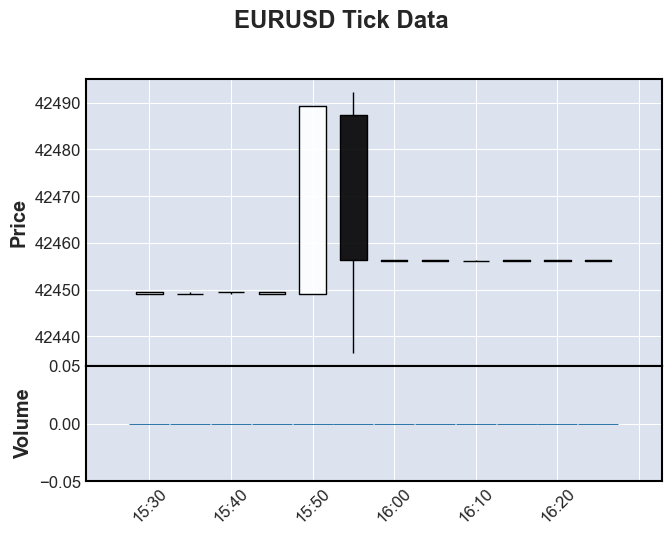

True

In [ ]:
from datetime import datetime
import MetaTrader5 as mt5
import pandas as pd
import pytz
import mplfinance as mpf

# Initialize MetaTrader5
if not mt5.initialize():
    print("initialize() failed, error code =", mt5.last_error())
    quit()

# Set time zone to UTC
timezone = pytz.timezone("Etc/UTC")

# Define the start and end time for the data extraction
start_time = datetime(2024, 10, 11, 15, 30, tzinfo=timezone)
end_time = datetime(2024, 10, 11, 16, 30, tzinfo=timezone)

# Fetch ticks within the specified time range
ticks = mt5.copy_ticks_range("US30", start_time, end_time, mt5.COPY_TICKS_ALL)

# Check if ticks is not None and contains data
if ticks is not None and len(ticks) > 0:
    # Create DataFrame from ticks
    df_ticks = pd.DataFrame(ticks)

    # Convert 'time' column to datetime if it exists
    df_ticks['time'] = pd.to_datetime(df_ticks['time'], unit='s')

    # Resample to 5-minute intervals to create OHLC data
    df_ohlc = df_ticks.resample('5min', on='time').agg({
        'bid': ['first', 'max', 'min', 'last'],
        'volume': 'sum'
    })

    # Flatten MultiIndex columns for OHLC data
    df_ohlc.columns = ['_'.join(col) for col in df_ohlc.columns]

    # Prepare data for mplfinance
    df_plot = df_ohlc[['bid_first', 'bid_max', 'bid_min', 'bid_last']].copy()
    df_plot.columns = ['Open', 'High', 'Low', 'Close']

    # Add Volume column to df_plot
    df_plot['Volume'] = df_ohlc['volume_sum']

    # Plot using mplfinance with volume
    mpf.plot(df_plot,
             type='candle',
             volume=True,
             title='EURUSD Tick Data',
             ylabel='Price',
             ylabel_lower='Volume')
else:
    print("No tick data returned.")

# Shut down connection to the MetaTrader 5 terminal
mt5.shutdown()

In [ ]:
from datetime import datetime, timedelta
import pytz

# Define the time zone
timezone = pytz.timezone("Etc/UTC")

# Get the current date
end_date = datetime.now(timezone)

# Calculate the last month's date
start_date = end_date - timedelta(days=30)

# Create a list to hold the working days' intervals
time_intervals = []

# List of weekdays (Monday=0, Sunday=6)
weekdays = range(0, 5)  # Monday to Friday

# Iterate from start_date to end_date
current_date = start_date
while current_date <= end_date:
    if current_date.weekday() in weekdays:
        # Create the time interval (15:30 to 16:30)
        start_time = current_date.replace(hour=15, minute=30, second=0, microsecond=0)
        end_time = current_date.replace(hour=16, minute=30, second=0, microsecond=0)
        time_intervals.append((start_time, end_time))

    # Move to the next day
    current_date += timedelta(days=1)

# Output the first few intervals to verify
print(time_intervals[:5])
print(f"Total intervals: {len(time_intervals)}")

[(datetime.datetime(2024, 9, 16, 15, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>), datetime.datetime(2024, 9, 16, 16, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>)), (datetime.datetime(2024, 9, 17, 15, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>), datetime.datetime(2024, 9, 17, 16, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>)), (datetime.datetime(2024, 9, 18, 15, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>), datetime.datetime(2024, 9, 18, 16, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>)), (datetime.datetime(2024, 9, 19, 15, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>), datetime.datetime(2024, 9, 19, 16, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>)), (datetime.datetime(2024, 9, 20, 15, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>), datetime.datetime(2024, 9, 20, 16, 30, tzinfo=<StaticTzInfo 'Etc/UTC'>))]
Total intervals: 22


C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


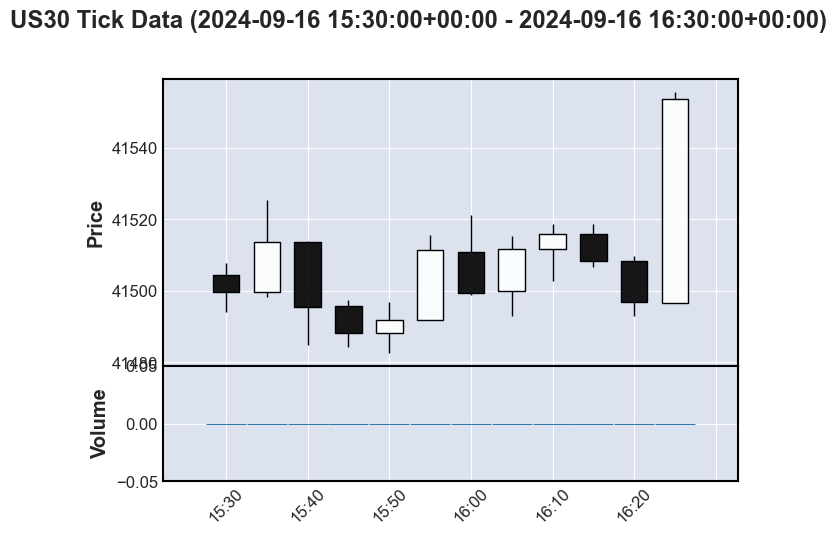

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


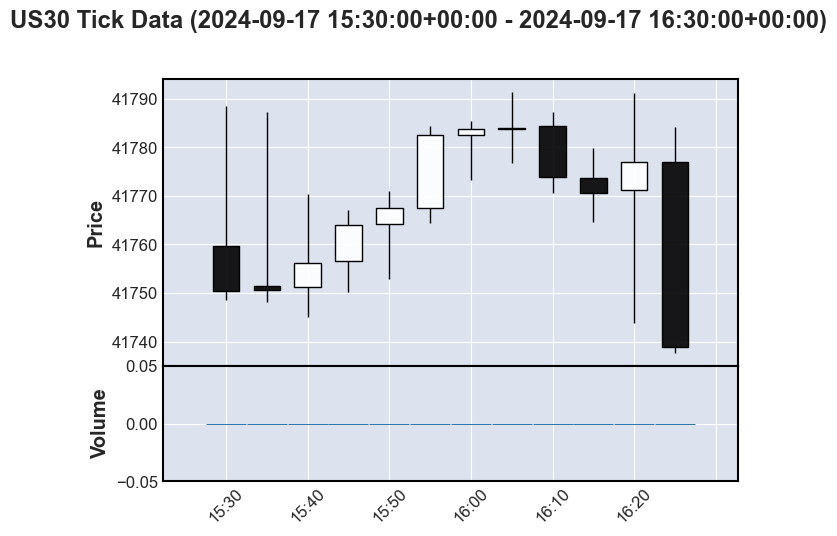

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


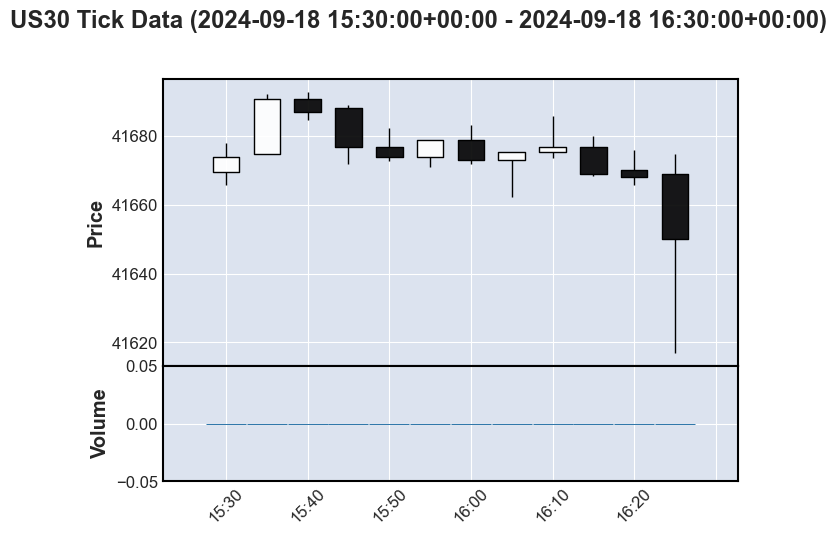

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


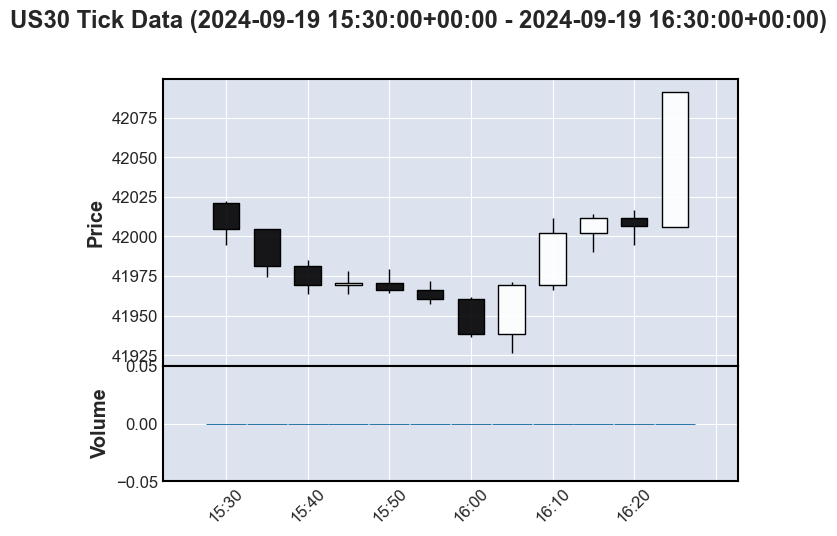

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


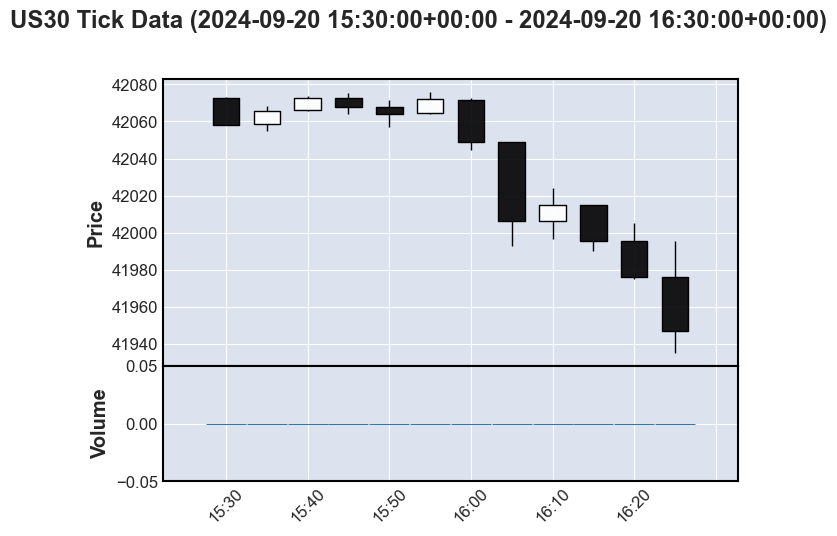

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


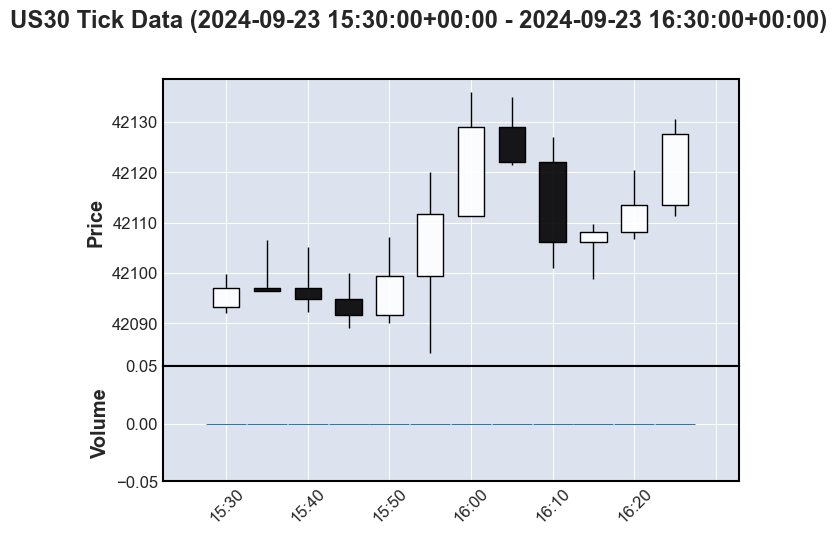

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


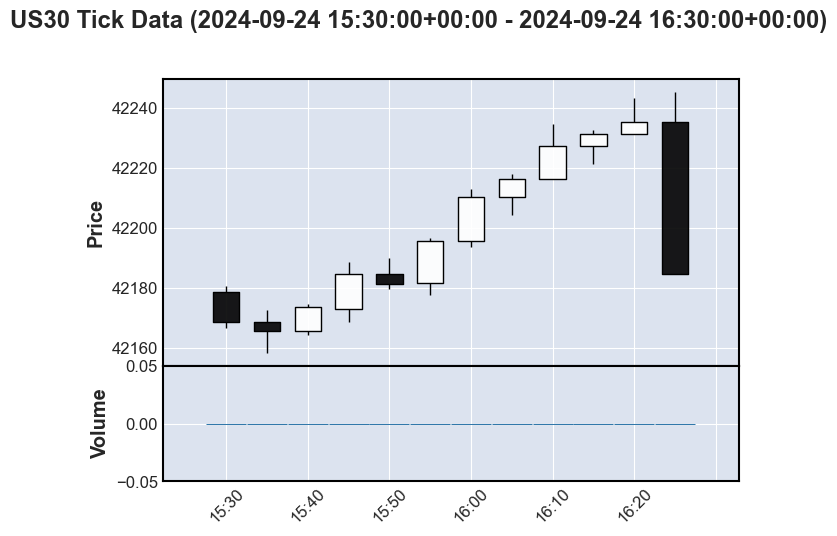

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


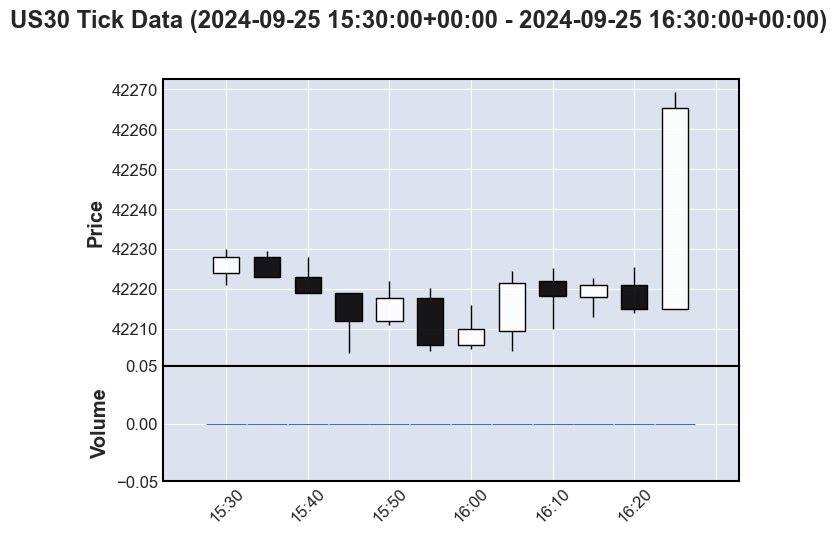

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


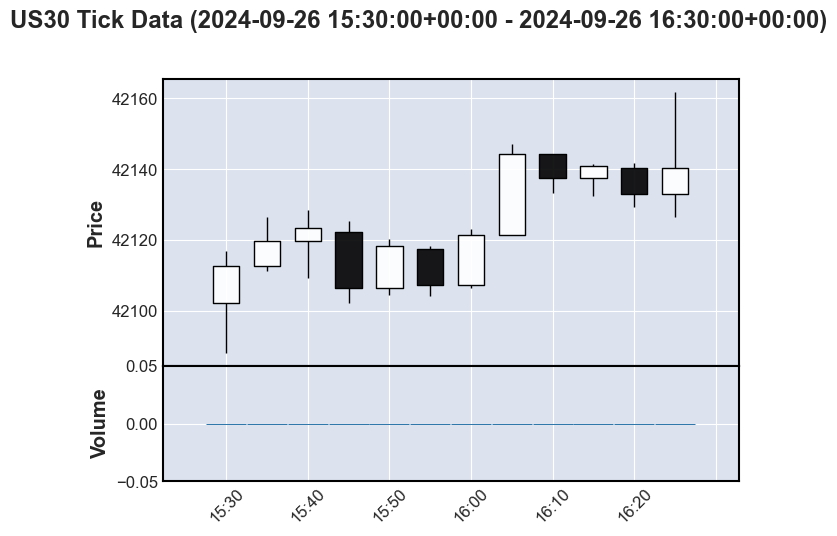

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


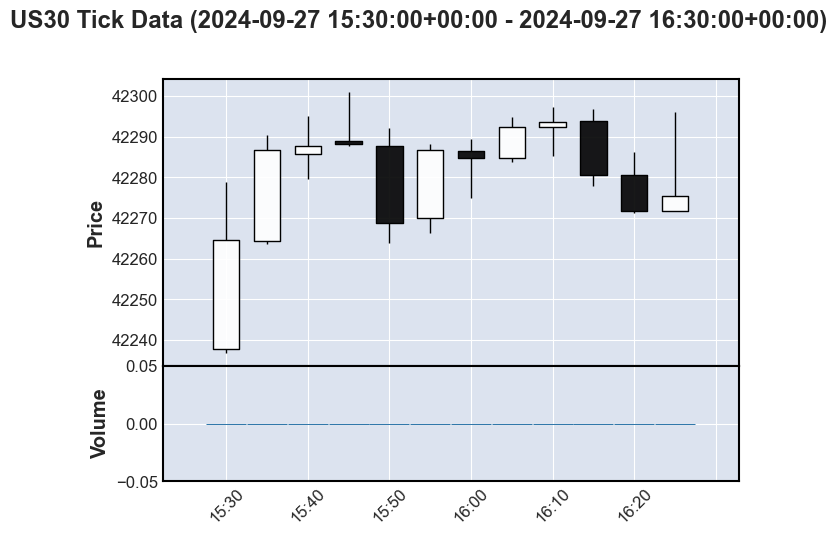

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


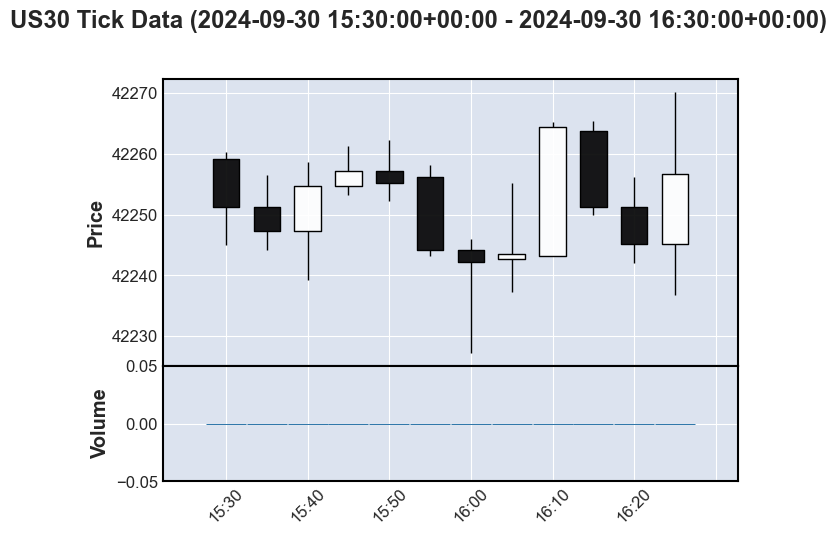

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


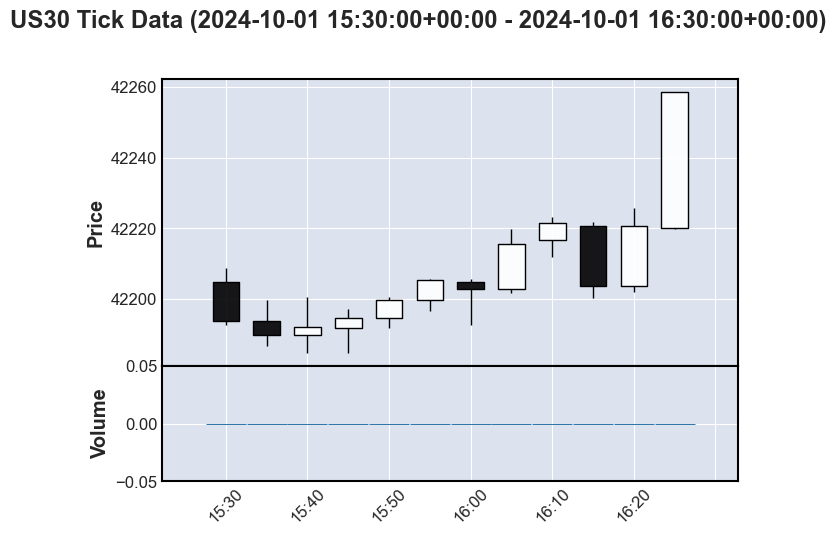

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


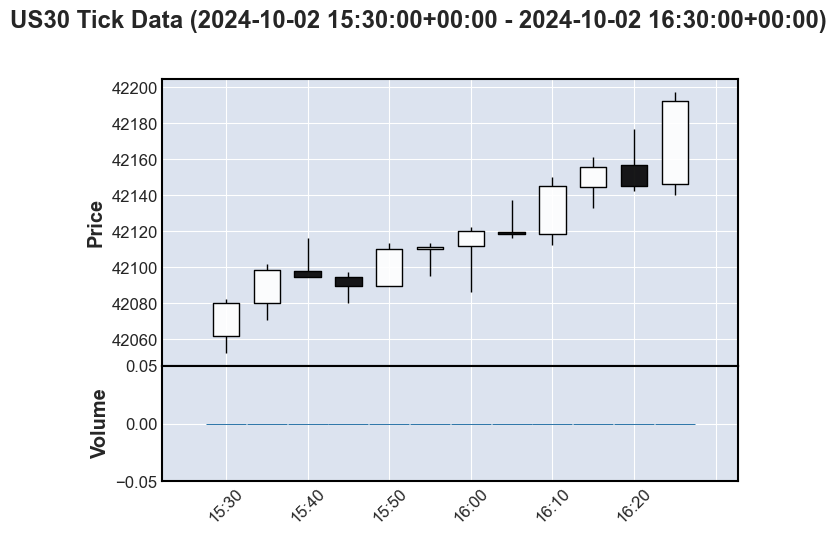

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


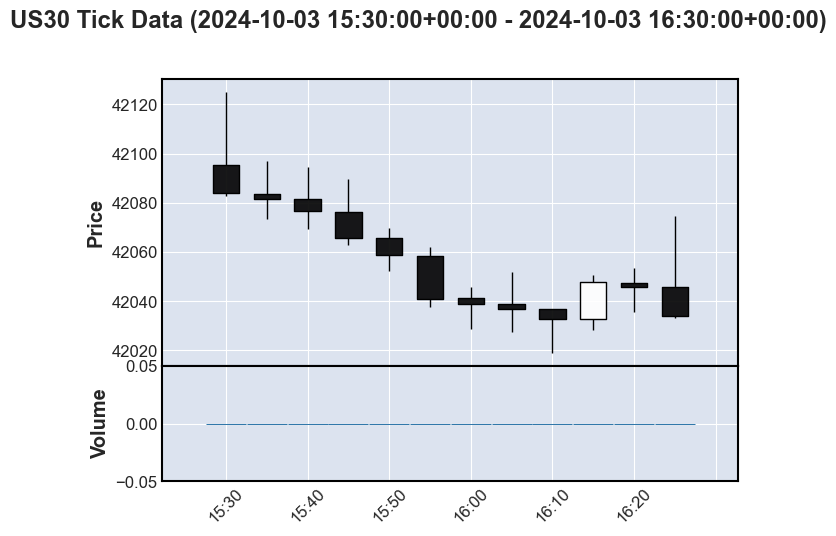

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


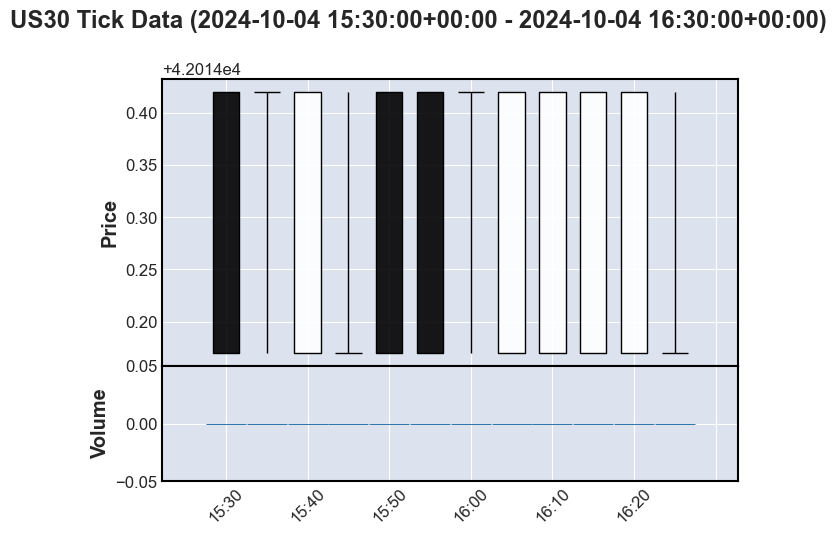

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


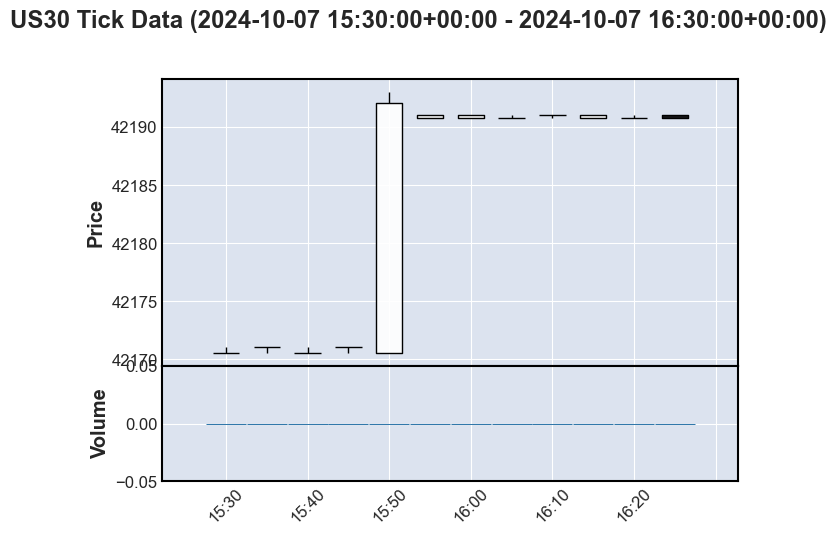

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


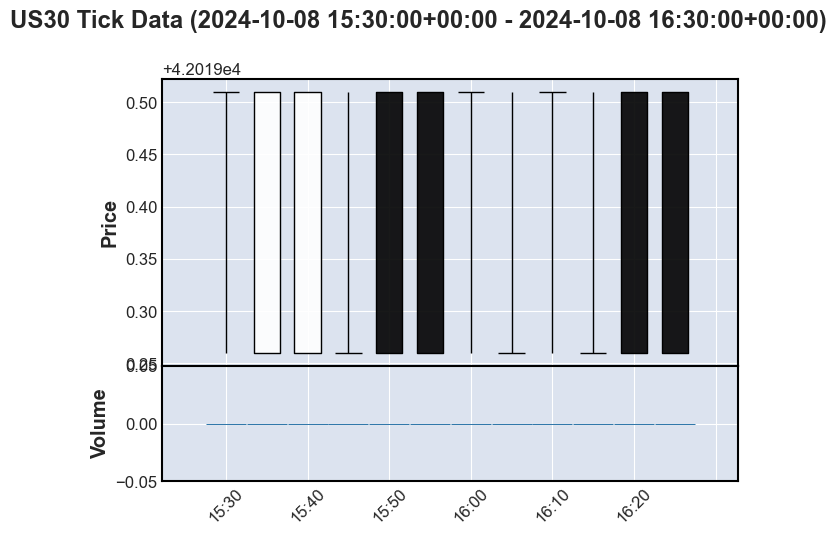

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


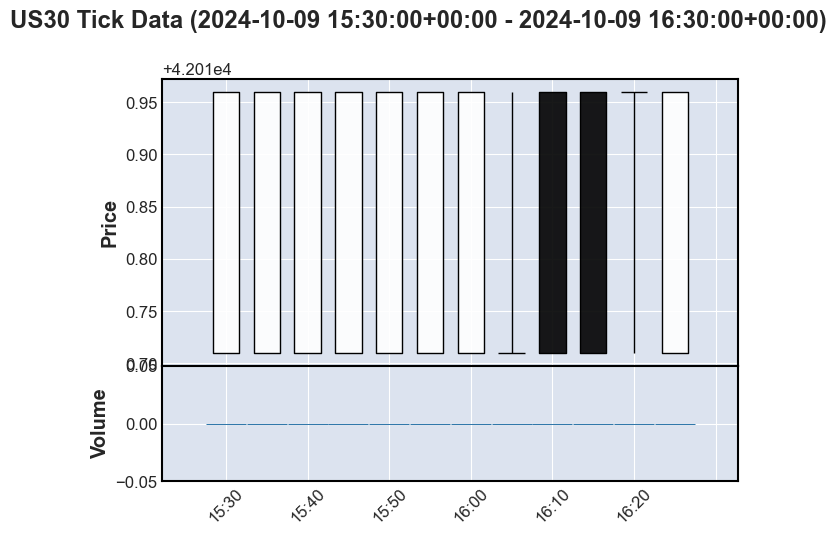

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


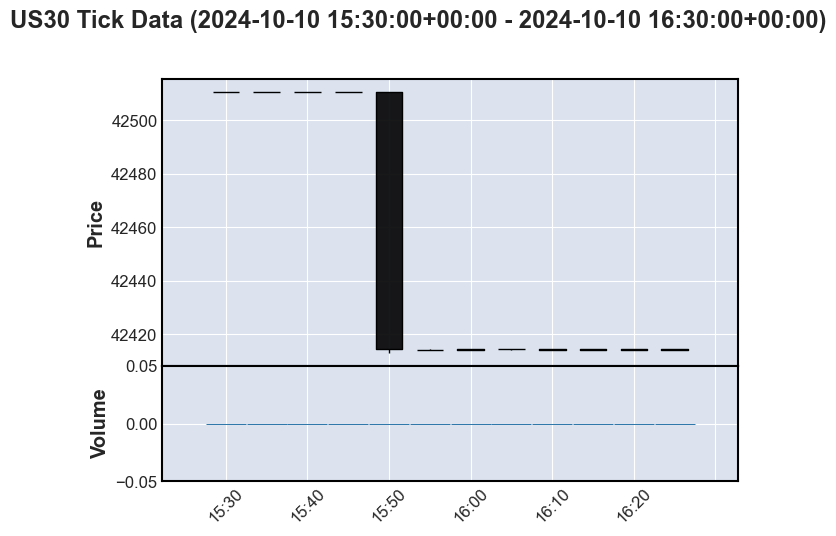

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


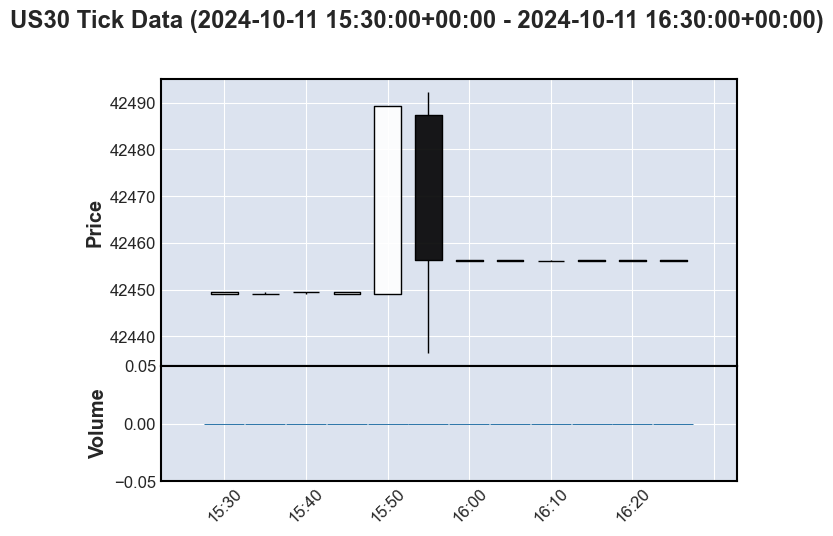

C:\Users\Arhtu\AppData\Roaming\Python\Python312\site-packages\mplfinance\plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


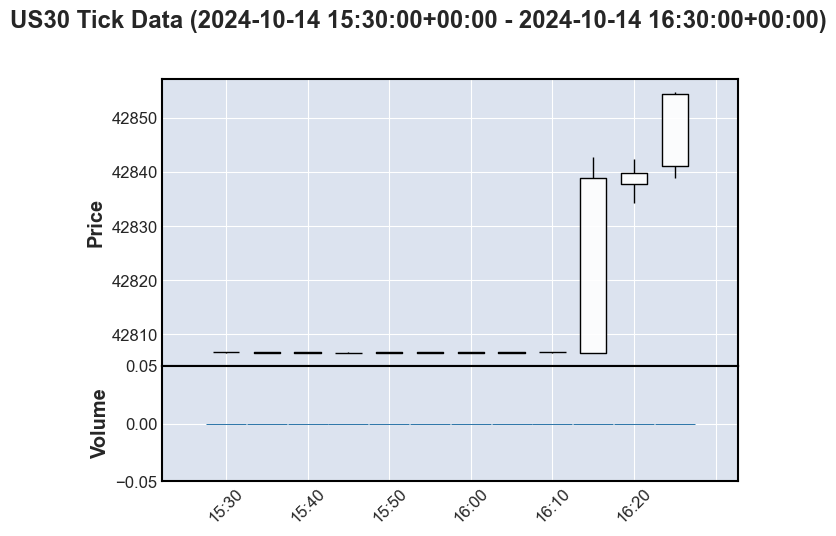

No tick data returned for the interval: 2024-10-15 15:30:00+00:00 - 2024-10-15 16:30:00+00:00


In [ ]:
from datetime import datetime
import MetaTrader5 as mt5
import pandas as pd
import pytz
import mplfinance as mpf

def plot_charts(symbol, time_intervals):
    # Initialize MetaTrader5
    if not mt5.initialize():
        print("initialize() failed, error code =", mt5.last_error())
        return

    # Set time zone to UTC
    timezone = pytz.timezone("Etc/UTC")

    for interval in time_intervals:
        start_time, end_time = interval

        # Fetch ticks within the specified time range
        ticks = mt5.copy_ticks_range(symbol, start_time, end_time, mt5.COPY_TICKS_ALL)

        # Check if ticks is not None and contains data
        if ticks is not None and len(ticks) > 0:
            # Create DataFrame from ticks
            df_ticks = pd.DataFrame(ticks)

            # Convert 'time' column to datetime if it exists
            df_ticks['time'] = pd.to_datetime(df_ticks['time'], unit='s')

            # Resample to 5-minute intervals to create OHLC data
            df_ohlc = df_ticks.resample('5min', on='time').agg({
                'bid': ['first', 'max', 'min', 'last'],
                'volume': 'sum'
            })

            # Flatten MultiIndex columns for OHLC data
            df_ohlc.columns = ['_'.join(col) for col in df_ohlc.columns]

            # Prepare data for mplfinance
            df_plot = df_ohlc[['bid_first', 'bid_max', 'bid_min', 'bid_last']].copy()
            df_plot.columns = ['Open', 'High', 'Low', 'Close']

            # Add Volume column to df_plot
            df_plot['Volume'] = df_ohlc['volume_sum']

            # Plot using mplfinance with volume
            mpf.plot(df_plot,
                     type='candle',
                     volume=True,
                     title=f'{symbol} Tick Data ({start_time} - {end_time})',
                     ylabel='Price',
                     ylabel_lower='Volume')
        else:
            print(f"No tick data returned for the interval: {start_time} - {end_time}")

    # Shut down connection to the MetaTrader 5 terminal
    mt5.shutdown()

# Example usage
symbol = "US30"

plot_charts(symbol, time_intervals)